In [1]:
import pandas as pd
from sklearn import preprocessing
import glob
import os



In [2]:
list_of_test_files = glob.glob("out/out_test*.csv")
list_of_test_files.sort(key=os.path.getmtime)
last_test_file = list_of_test_files[-1]
last2_test_file = list_of_test_files[-2]
list_of_train_files = glob.glob("out/out_train*.csv")
list_of_train_files.sort(key=os.path.getmtime)
last_train_file = list_of_train_files[-1]

print(last_test_file)
print(last_train_file)

out/out_test_20200529-235046.csv
out/out_train_20200530-000135.csv


In [3]:
new_data = pd.read_csv(last_test_file, usecols=['city', 'weekofyear', 'total_cases'])
prev_data = pd.read_csv(last2_test_file, usecols=['total_cases'])
# worst_data = pd.read_csv('out/out20200421-122140.csv', usecols=['total_cases'])
# best_data_reg = pd.read_csv('out/out_test_20200512-234321.csv', usecols=['total_cases'])
onethree_data = pd.read_csv('models/best-30-05-13,17MAE.csv', usecols=['total_cases'])
five_data = pd.read_csv('models/best-26-05-15MAE.csv', usecols=['total_cases'])
oneseven_data = pd.read_csv('models/best-26-05-15MAE.csv', usecols=['total_cases'])
# worst_data = pd.read_csv('out/out_test_20200526-124534.csv', usecols=['total_cases'])
train_data = pd.read_csv('dengue_features_train_with_out.csv')
train_data_out = pd.read_csv(last_train_file, usecols=['total_cases'])

In [4]:
new_data['13_cases'] = onethree_data['total_cases'].astype(int)
# new_data['15_cases'] = five_data['total_cases'].astype(int)
# new_data['17_cases'] = oneseven_data['total_cases'].astype(int)
# new_data['best_data_reg'] = best_data_reg['total_cases'].astype(int)
# new_data['prev_data'] = prev_data['total_cases'].astype(int)
new_data['total_cases'] = new_data['total_cases'].astype(int)

In [5]:
num = 3
new_data.iloc[-num:].append(new_data, ignore_index=True)

,city,weekofyear,total_cases,13_cases
0,iq,24,3,3
1,iq,25,3,3
2,iq,26,1,1
3,sj,18,8,1
4,sj,19,8,4
...,...,...,...,...
414,iq,22,3,3
415,iq,23,1,1
416,iq,24,3,3
417,iq,25,3,3


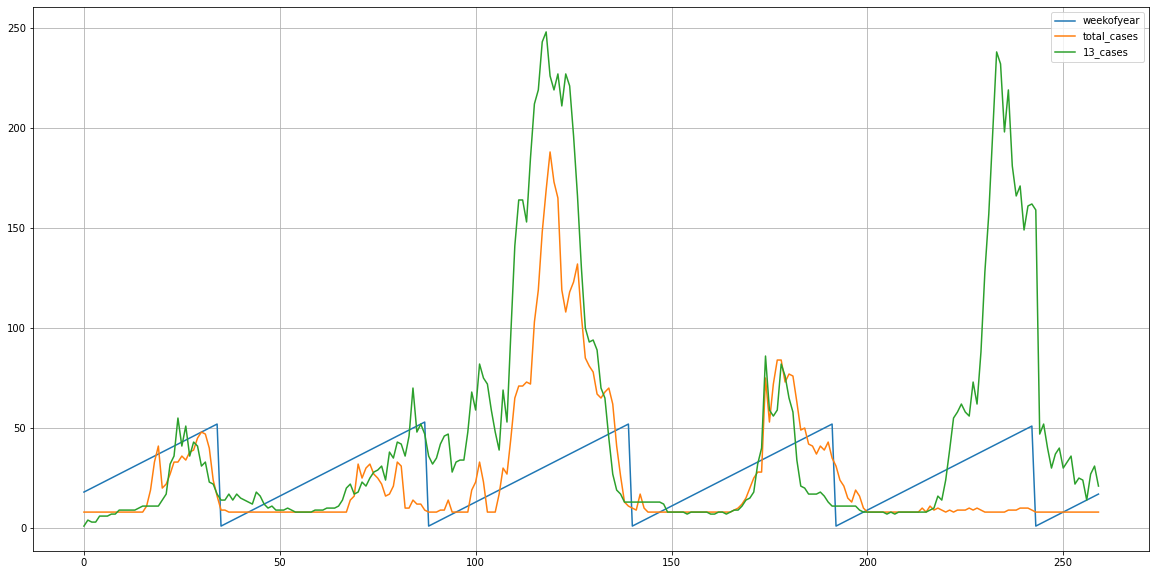

In [6]:
new_data[new_data['city'] == 'sj'].plot(figsize=(20,10), grid=True)

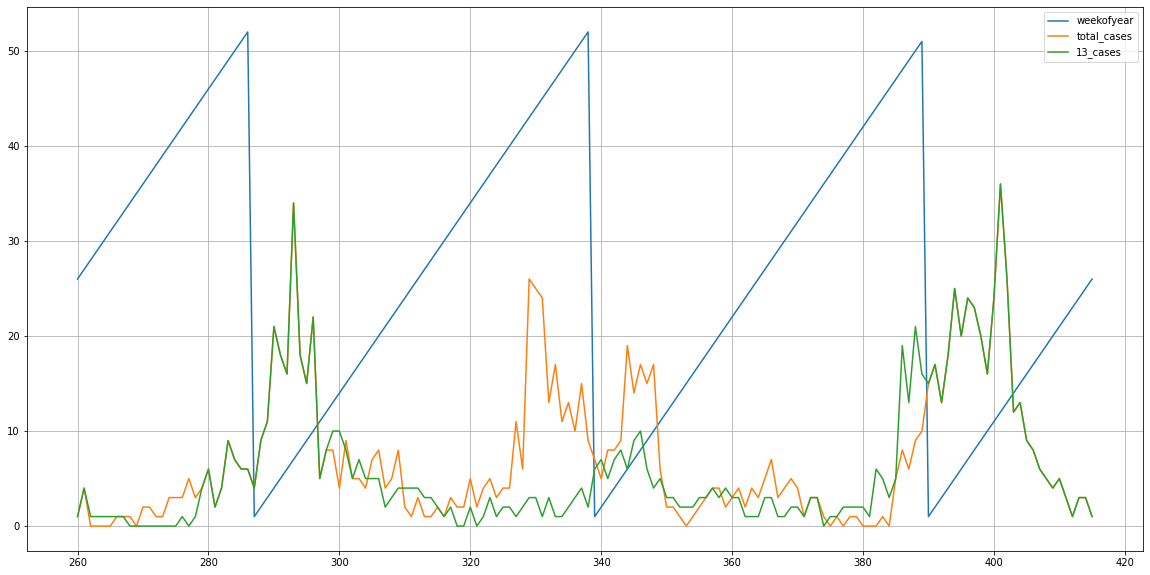

In [7]:
new_data[new_data['city'] == 'iq'].plot(figsize=(20,10), grid=True)

/home/piro/anaconda3/envs/imad/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


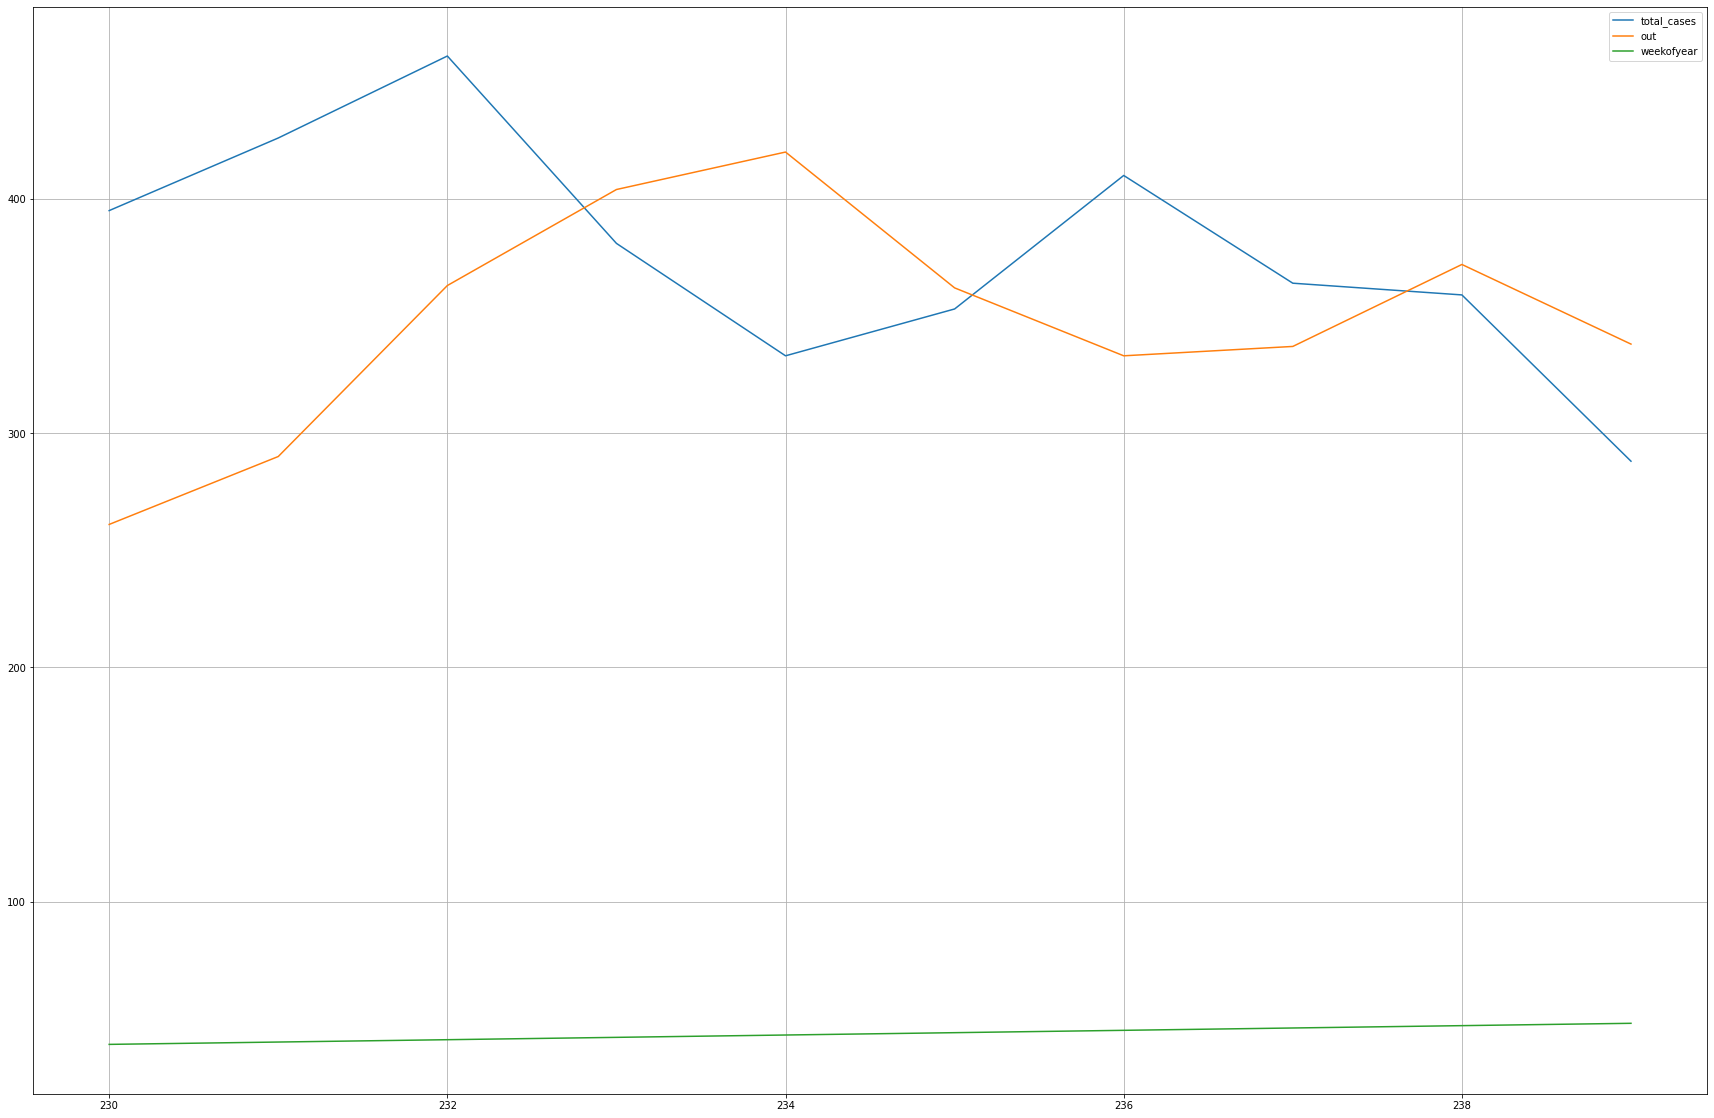

In [8]:
train_data['out'] = train_data_out['total_cases']
train_data[230:240][train_data['city'] == 'sj'][['total_cases', 'out', 'weekofyear']].plot(figsize=(30,20), grid=True)

/home/piro/anaconda3/envs/imad/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


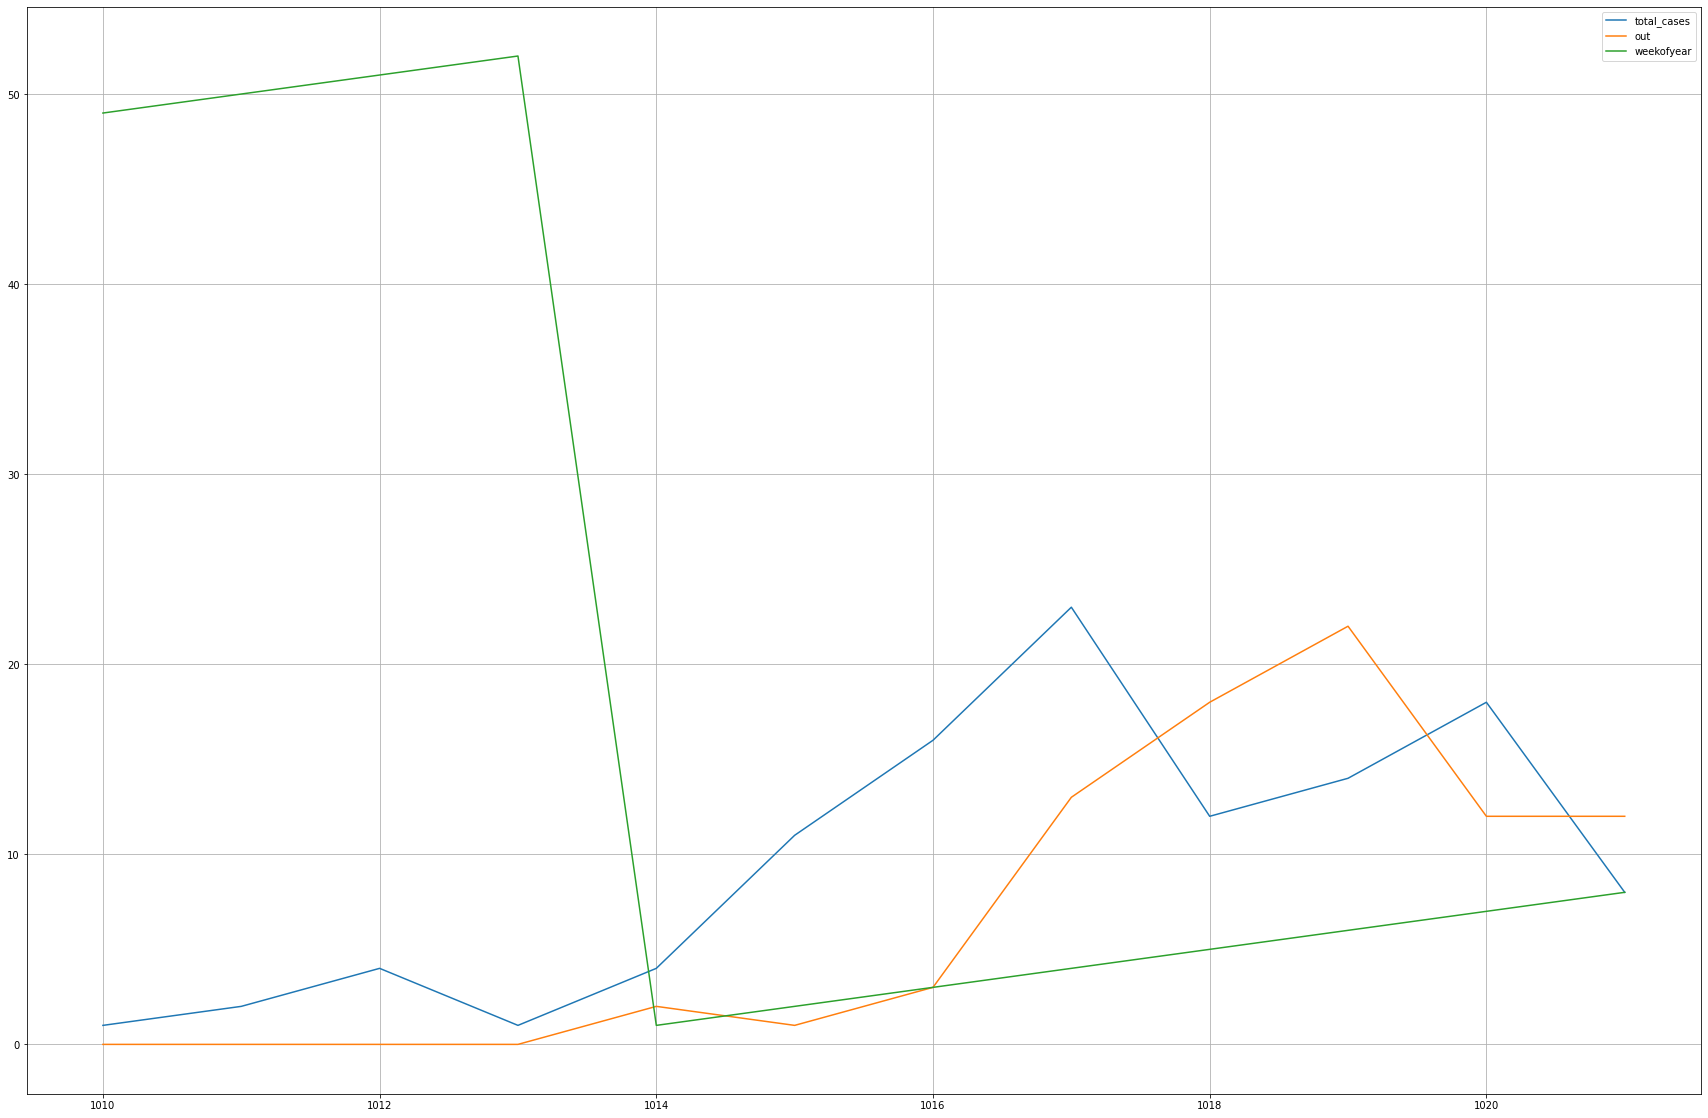

In [9]:
train_data[1010:1022][train_data['city'] == 'iq'][['total_cases', 'out', 'weekofyear']].plot(figsize=(30,20), grid=True)